In [116]:
# Imports and Setup
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import librosa
import IPython.display

# has to be set in order to show the image in notebook
%matplotlib inline 

In [117]:
try:
    os.chdir("./Resources")
except:
    pass

y, sr = librosa.load("./single-snare.wav", duration=5)
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

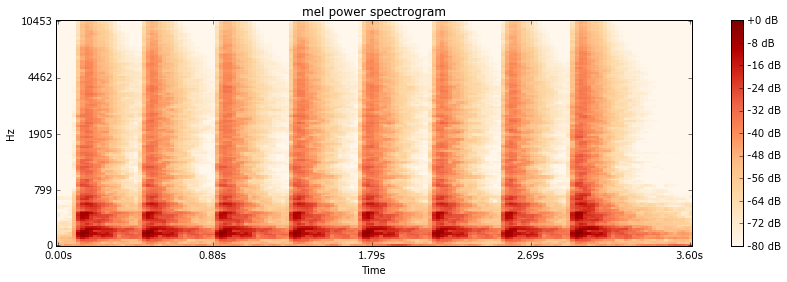

In [118]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

o_env = librosa.onset.onset_strength(y, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [119]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times  = librosa.frames_to_time(onset_frames[:], sr=sr)

(0.0, 157.0, 0.0, 25.022939959820093)

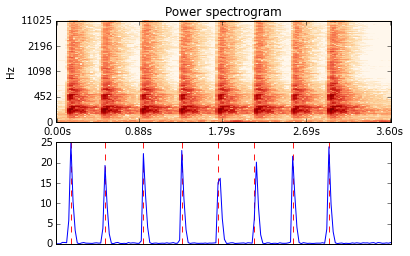

In [120]:
D = np.abs(librosa.stft(y))**2
plt.figure()

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
plt.plot(o_env, label='Onset strength')
plt.vlines(onset_frames, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xticks([])
plt.axis('tight')

In [121]:
onset_stfts = []
for frame in onset_frames:
    print np.abs(D[:, time])
    onset_stfts.append(np.abs(D[:, frame]))

[  3.45018990e-02   5.02809808e-02   2.60043237e-02 ...,   1.16638152e-03
   5.61746885e-04   1.57106042e-05]
[  3.45018990e-02   5.02809808e-02   2.60043237e-02 ...,   1.16638152e-03
   5.61746885e-04   1.57106042e-05]
[  3.45018990e-02   5.02809808e-02   2.60043237e-02 ...,   1.16638152e-03
   5.61746885e-04   1.57106042e-05]
[  3.45018990e-02   5.02809808e-02   2.60043237e-02 ...,   1.16638152e-03
   5.61746885e-04   1.57106042e-05]
[  3.45018990e-02   5.02809808e-02   2.60043237e-02 ...,   1.16638152e-03
   5.61746885e-04   1.57106042e-05]
[  3.45018990e-02   5.02809808e-02   2.60043237e-02 ...,   1.16638152e-03
   5.61746885e-04   1.57106042e-05]
[  3.45018990e-02   5.02809808e-02   2.60043237e-02 ...,   1.16638152e-03
   5.61746885e-04   1.57106042e-05]
[  3.45018990e-02   5.02809808e-02   2.60043237e-02 ...,   1.16638152e-03
   5.61746885e-04   1.57106042e-05]


In [122]:
filename = raw_input()

snareSample.csv


In [123]:
with open('../data/' + filename, 'w+') as f:
    fw = csv.writer(f, delimiter=',')
    
    for i in range(len(onset_frames)):
        # onset_stfts is an array of ndarrays so we need to cast to list
        fw.writerow([onset_frames[i], onset_stfts[i].tolist()]) 

1025